In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [78]:
from bs4 import BeautifulSoup as BS
import requests

#####
id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartment interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [79]:
raw=pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)

In [80]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [81]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [82]:
raw['id'] = range(1, len(raw) + 1)
raw.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,2,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,3,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,4,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,5,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
5,6,20140512T000000,1225000.00000,4,4.50000,5420,101930,1.00000,0,0,3,11,3890,1530,2001,0,98053,47.65610,-122.00500,4760,101930
6,7,20140627T000000,257500.00000,3,2.25000,1715,6819,2.00000,0,0,3,7,1715,0,1995,0,98003,47.30970,-122.32700,2238,6819
7,8,20150115T000000,291850.00000,3,1.50000,1060,9711,1.00000,0,0,3,7,1060,0,1963,0,98198,47.40950,-122.31500,1650,9711
8,9,20150415T000000,229500.00000,3,1.00000,1780,7470,1.00000,0,0,3,7,1050,730,1960,0,98146,47.51230,-122.33700,1780,8113
9,10,20150312T000000,323000.00000,3,2.50000,1890,6560,2.00000,0,0,3,7,1890,0,2003,0,98038,47.36840,-122.03100,2390,7570


In [83]:
raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [84]:
raw.shape

(21613, 21)

In [85]:
raw.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### sqft_living=basement+above

In [86]:
raw['date'] = pd.to_datetime(raw['date'])
raw.price = raw.price.astype(int)
raw.bathrooms = raw.bathrooms.astype(int)
raw.floors = raw.floors.astype(int)
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [87]:
len(raw['zipcode'].value_counts().unique())

66

In [88]:
raw['houseage']=raw['date'].dt.year-raw['yr_built']

In [89]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,houseage
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650,59
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639,63
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062,82
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000,49
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509,5
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200,1
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007,5
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287,11


##### defining a categorical variable on basement whether there is presence of basement or not

In [90]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,houseage
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650,59
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639,63
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062,82
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000,49
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509,5
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200,1
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007,5
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287,11


In [91]:
def has_basement(raw):
    '''creates bool feature has_basement and drops original basement feature'''
    raw['has_underground'] = raw['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
#     raw = raw.drop('sqft_basement', axis = 1)
    return raw

In [92]:
raw=has_basement(raw)

##### defining a categorical variable on renovation whether houses has been renovated or not

In [93]:
def has_renovated(raw):
    raw['has_renovated']=raw['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
    raw=raw.drop('yr_renovated',axis=1)
    return raw

In [94]:
raw=has_renovated(raw)

##### histogram to represent the frequency distribution of a few data points of column variable variable

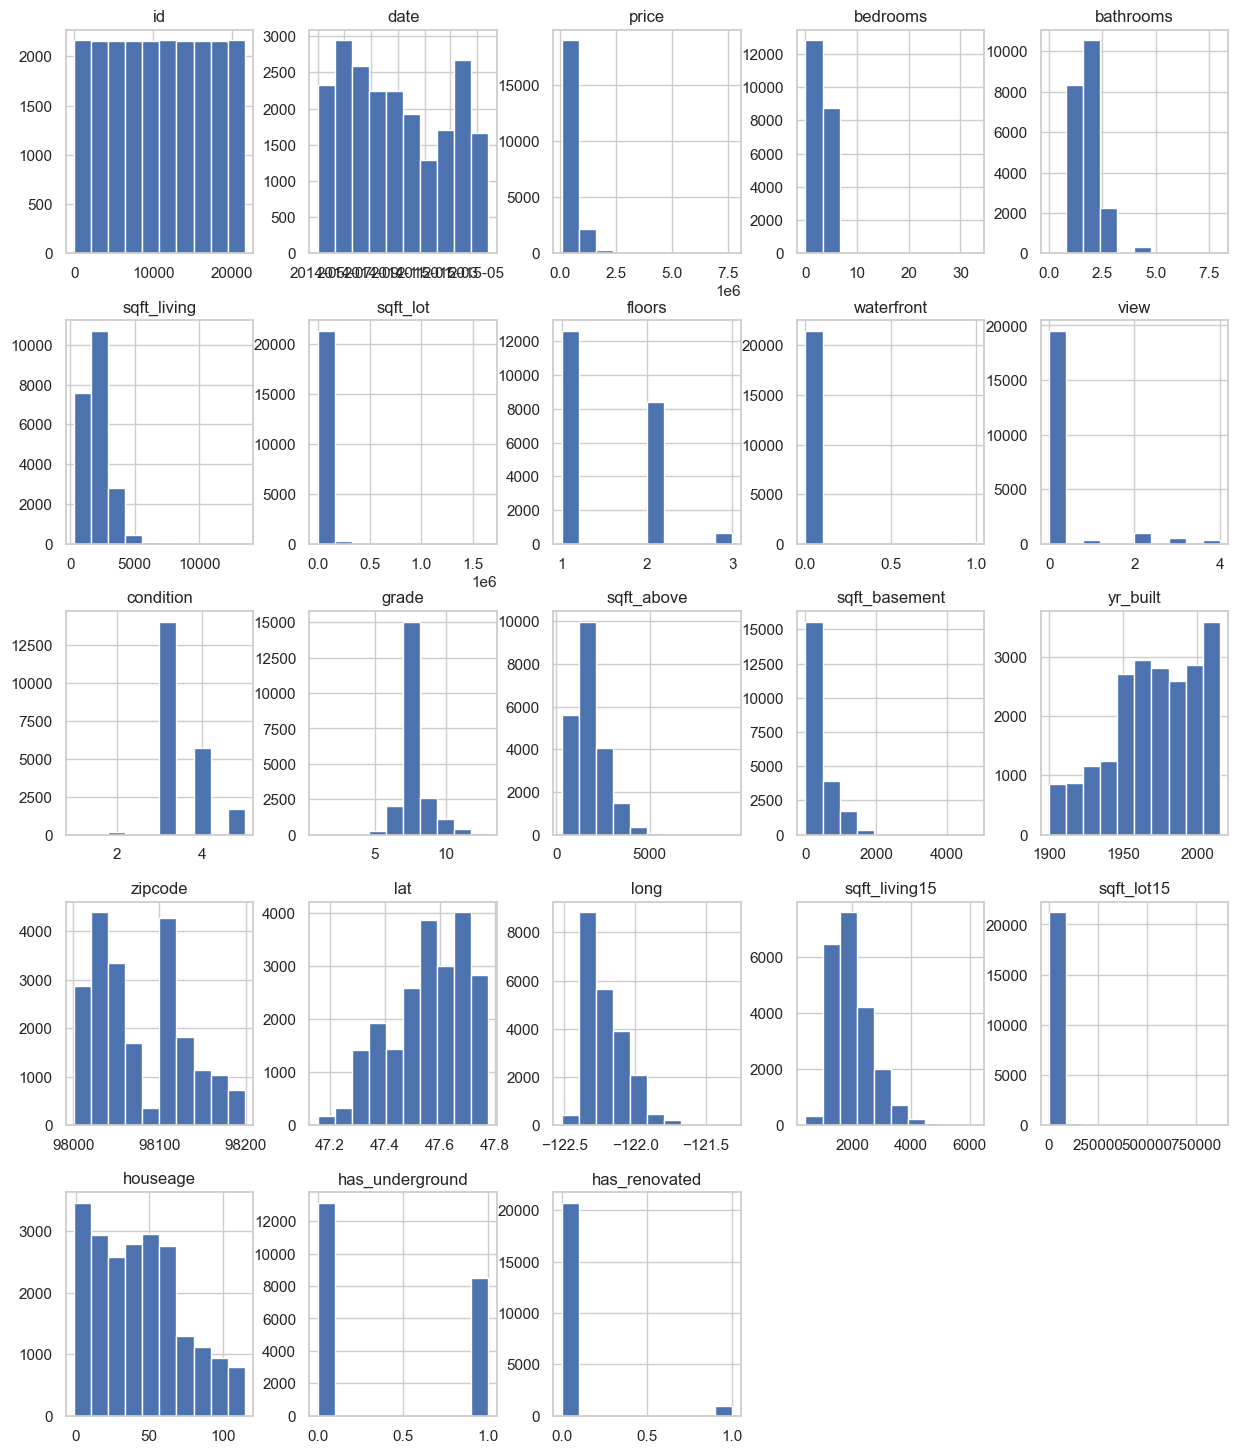

In [95]:

raw.hist(figsize = (15,18))
plt.show()

In [96]:
cols=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'houseage', 'has_underground', 'has_renovated']

In [97]:
raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'houseage', 'has_underground',
       'has_renovated'],
      dtype='object')

In [98]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.51120,-122.25700,1340,5650,59,0,0
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.72100,-122.31900,1690,7639,63,1,1
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.73790,-122.23300,2720,8062,82,0,0
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,47.52080,-122.39300,1360,5000,49,1,0
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,47.61680,-122.04500,1800,7503,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,98103,47.69930,-122.34600,1530,1509,5,0,0
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,98146,47.51070,-122.36200,1830,7200,1,0,0
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,98144,47.59440,-122.29900,1020,2007,5,0,0
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,98027,47.53450,-122.06900,1410,1287,11,0,0


In [99]:
raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,10807.00000,540088.14177,3.37084,1.74973,2079.89974,15106.96757,1.44621,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,98077.93980,47.56005,-122.21390,1986.55249,12768.45565,43.31782,0.39268,0.04229
std,6239.28002,367127.19648,0.93006,0.73487,918.44090,41420.51152,0.55189,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,53.50503,0.13856,0.14083,685.39130,27304.17963,29.37549,0.48836,0.20125
min,1.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000,-1.00000,0.00000,0.00000
25%,5404.00000,321950.00000,3.00000,1.00000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000,18.00000,0.00000,0.00000
50%,10807.00000,450000.00000,3.00000,2.00000,1910.00000,7618.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000,40.00000,0.00000,0.00000
75%,16210.00000,645000.00000,4.00000,2.00000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000,63.00000,1.00000,0.00000
max,21613.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.00000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000,115.00000,1.00000,1.00000


In [100]:
url = "https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033"
data = requests.get(url)
soup = BS(data.text,'html.parser')

In [101]:
ZipCode_dict = {}
for i in soup.find_all(border = '3'):

    for j in i.find_all('tr'):
        k = j.find(align='left')
        if k!= None:
            zip = int(k.get_text())
            city = k.next_sibling.next_sibling.get_text()
            ZipCode_dict[zip]=city

In [102]:
raw['city'] = raw["zipcode"].map(ZipCode_dict)

In [103]:
raw['city'].nunique()

25

In [104]:
raw.head(45)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated,city
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.51120,-122.25700,1340,5650,59,0,0,Tukwila
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.72100,-122.31900,1690,7639,63,1,1,Seattle
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.73790,-122.23300,2720,8062,82,0,0,Bothell
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,47.52080,-122.39300,1360,5000,49,1,0,Seattle
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,47.61680,-122.04500,1800,7503,28,0,0,Redmond
5,6,2014-05-12,1225000,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,98053,47.65610,-122.00500,4760,101930,13,1,0,Redmond
6,7,2014-06-27,257500,3,2,1715,6819,2,0,0,3,7,1715,0,1995,98003,47.30970,-122.32700,2238,6819,19,0,0,Federal Way
7,8,2015-01-15,291850,3,1,1060,9711,1,0,0,3,7,1060,0,1963,98198,47.40950,-122.31500,1650,9711,52,0,0,Seattle
8,9,2015-04-15,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,98146,47.51230,-122.33700,1780,8113,55,1,0,Seattle
9,10,2015-03-12,323000,3,2,1890,6560,2,0,0,3,7,1890,0,2003,98038,47.36840,-122.03100,2390,7570,12,0,0,Maple Valley


In [105]:
raw['city']

0         Tukwila
1         Seattle
2         Bothell
3         Seattle
4         Redmond
           ...   
21608     Seattle
21609     Seattle
21610     Seattle
21611    Issaquah
21612     Seattle
Name: city, Length: 21613, dtype: object

In [106]:
raw.isnull().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
houseage             0
has_underground      0
has_renovated        0
city               198
dtype: int64

In [107]:
raw=raw.dropna()

In [108]:
raw.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
houseage           0
has_underground    0
has_renovated      0
city               0
dtype: int64

In [109]:
dummies = pd.get_dummies(raw['city'],prefix='city', drop_first = True)
raw = raw.merge(dummies, left_index = True, right_index = True)
raw.drop(columns = 'city', inplace = True)
raw.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.51120,-122.25700,1340,5650,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.72100,-122.31900,1690,7639,63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.73790,-122.23300,2720,8062,82,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.51120,-122.25700,1340,5650,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.72100,-122.31900,1690,7639,63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.73790,-122.23300,2720,8062,82,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,47.52080,-122.39300,1360,5000,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,47.61680,-122.04500,1800,7503,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,98103,47.69930,-122.34600,1530,1509,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,98146,47.51070,-122.36200,1830,7200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,98144,47.59440,-122.29900,1020,2007,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,98027,47.53450,-122.06900,1410,1287,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### boxplot to view any presence ofoutliers in the dataset

<AxesSubplot: xlabel='price'>

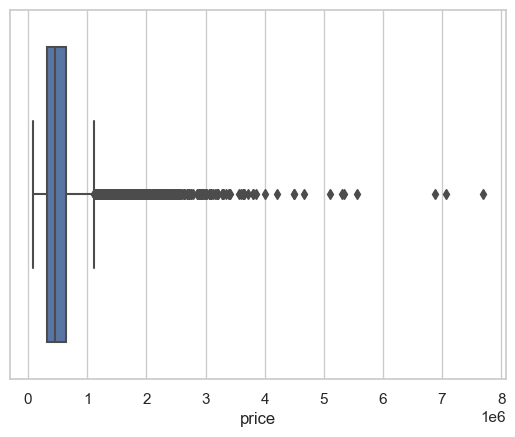

In [111]:
sns.boxplot(x=raw['price'])

<AxesSubplot: xlabel='bedrooms'>

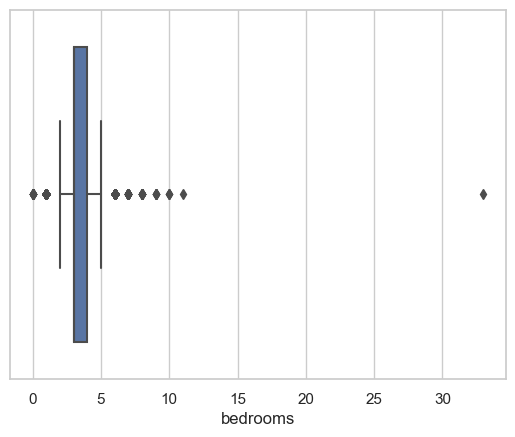

In [112]:
sns.boxplot(x=raw['bedrooms'])

<AxesSubplot: xlabel='sqft_living'>

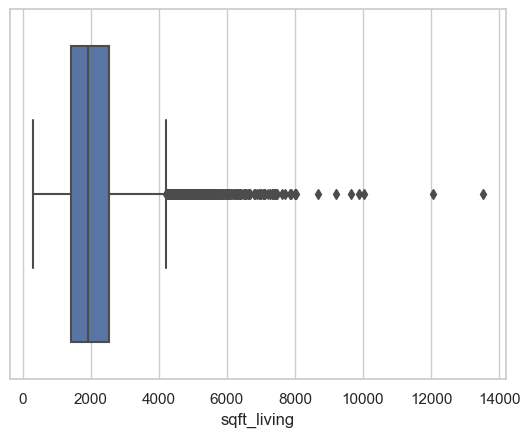

In [113]:
sns.boxplot(x=raw['sqft_living'])

<AxesSubplot: xlabel='sqft_basement'>

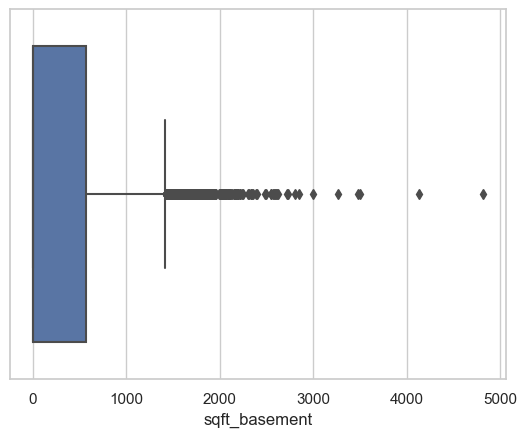

In [114]:
sns.boxplot(x=raw['sqft_basement'])

<AxesSubplot: xlabel='sqft_lot'>

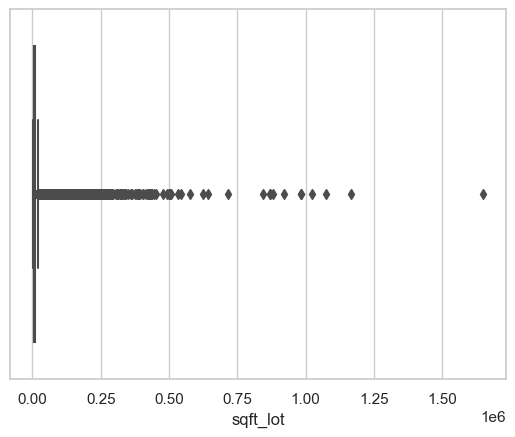

In [115]:
sns.boxplot(x=raw['sqft_lot'])

<AxesSubplot: xlabel='floors'>

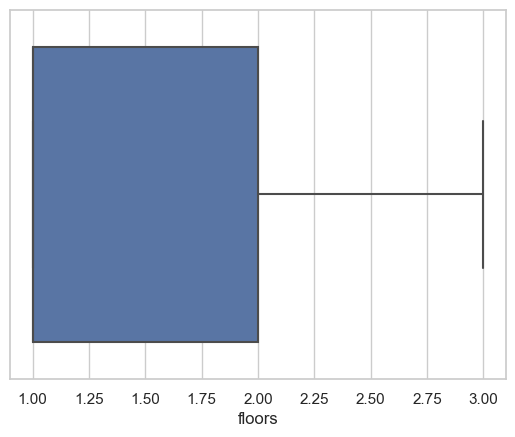

In [116]:
sns.boxplot(x=raw['floors'])

<AxesSubplot: xlabel='has_underground'>

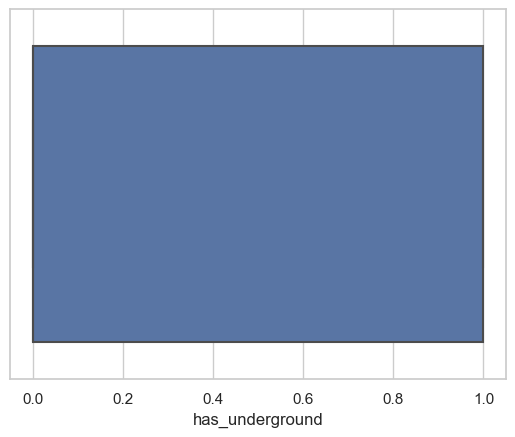

In [117]:
sns.boxplot(x=raw['has_underground'])

##### value of the z-score tells you how many standard deviations you are away from the mean.
##### using z score to calculate the outliers using the upper limit and lower limit of the variables

#####    Upper: Mean + 3 * standard deviation.
#####    Lower: MEan – 3 * standard deviation.

##### The function removes the outliers by selecting only the entries that have an absolute value of the Z-score less than or equal to 3 times the standard deviation of the column.

In [118]:
raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,1,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.51120,-122.25700,1340,5650,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.72100,-122.31900,1690,7639,63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.73790,-122.23300,2720,8062,82,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,47.52080,-122.39300,1360,5000,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,47.61680,-122.04500,1800,7503,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,2014-05-21,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,98103,47.69930,-122.34600,1530,1509,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21609,21610,2015-02-23,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,98146,47.51070,-122.36200,1830,7200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21610,21611,2014-06-23,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,98144,47.59440,-122.29900,1020,2007,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21611,21612,2015-01-16,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,98027,47.53450,-122.06900,1410,1287,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
raw['zipcode'].nunique()

69

In [120]:
raw.corr()['price']

C:\Users\nepal\AppData\Local\Temp\ipykernel_10984\2234101319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw.corr()['price']


id                    0.02803
price                 1.00000
bedrooms              0.30704
bathrooms             0.50791
sqft_living           0.70113
sqft_lot              0.08603
floors                0.23508
waterfront            0.26751
view                  0.39971
condition             0.03745
grade                 0.66666
sqft_above            0.60382
sqft_basement         0.32685
yr_built              0.05098
zipcode              -0.05330
lat                   0.30598
long                  0.01764
sqft_living15         0.58439
sqft_lot15            0.07844
houseage             -0.05093
has_underground       0.18327
has_renovated         0.12751
city_Bellevue         0.14253
city_Black Diamond   -0.02144
city_Bothell         -0.02668
city_Carnation       -0.01726
city_Duvall          -0.02933
city_Enumclaw        -0.06377
city_Fall City        0.00700
city_Federal Way     -0.16266
city_Issaquah         0.08449
city_Kent            -0.15873
city_Kirkland         0.06399
city_Maple

In [121]:
raw=raw.drop(['waterfront','grade','date','id','zipcode','sqft_living15','sqft_lot15'],axis=1)

In [122]:
raw.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'houseage', 'has_underground', 'has_renovated', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kent', 'city_Kirkland', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'],
      dtype='object')

##### checking for bedroom(outliers)

In [123]:
raw['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [124]:
raw.loc[raw['bedrooms'] == 9]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
4096,599999,9,4,3830,6988,2,0,3,2450,1380,1938,47.69270,-122.33800,76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4235,700000,9,3,3680,4400,2,0,3,2830,850,1908,47.63740,-122.32400,107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6079,1280000,9,4,3650,5000,2,0,3,2530,1120,1915,47.66040,-122.28900,99,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8546,450000,9,7,4050,6504,2,0,3,4050,0,1996,47.59230,-122.30100,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16844,1400000,9,4,4620,5508,2,0,3,3870,750,1915,47.66840,-122.30900,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
18443,934000,9,3,2820,4480,2,0,3,1880,940,1918,47.66540,-122.30700,97,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [125]:
raw.loc[raw['bedrooms'] == 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
13314,1148000,10,5,4590,10920,1,2,3,2500,2090,2008,47.58610,-122.11300,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15161,650000,10,2,3610,11914,2,0,4,3010,600,1958,47.57050,-122.17500,56,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19254,660000,10,3,2920,3745,2,0,4,1860,1060,1913,47.66350,-122.32000,101,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [126]:
raw.loc[raw['bedrooms'] == 11]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
8757,520000,11,3,3000,4960,2,0,3,2400,600,1918,47.55600,-122.36300,96,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [127]:
raw.loc[raw['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
15870,640000,33,1,1620,6000,1,0,5,1040,580,1947,47.68780,-122.33100,67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### removing bedrroms which doesnot make sense like house having sqft_lot of 3745 has 10 bedrooms

In [128]:
raw=raw.drop([19254,8757,15870])

In [129]:
raw['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 10], dtype=int64)

#### now for bathrooms(outliers)

In [130]:
raw['bathrooms'].unique()

array([1, 2, 3, 4, 0, 5, 6, 8, 7])

In [131]:
raw.loc[raw['bathrooms'] == 8]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
7252,7700000,6,8,12050,27600,2,3,4,8570,3480,1910,47.62980,-122.32300,104,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12777,2280000,7,8,13540,307752,3,4,3,9410,4130,1999,47.66750,-121.98600,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [132]:
raw=raw.drop([8546])

#### now for sqft_basement

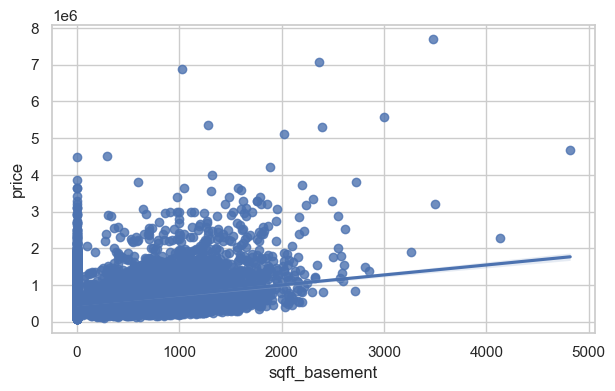

In [133]:
plt.figure(figsize=(7,4))
sns.regplot(data=raw, x='sqft_basement', y='price')
plt.show()

In [134]:
raw.sort_values(by='sqft_basement', ascending=False).head(25)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
8092,4668000,5,6,9640,13068,1,4,3,4820,4820,1983,47.55700,-122.21000,31,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12777,2280000,7,8,13540,307752,3,4,3,9410,4130,1999,47.66750,-121.98600,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
15482,3200000,4,3,7000,28206,1,4,4,3500,3500,1991,47.59280,-122.08600,23,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7252,7700000,6,8,12050,27600,2,3,4,8570,3480,1910,47.62980,-122.32300,104,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10085,1900000,5,4,6510,16471,2,3,4,3250,3260,1980,47.57580,-122.24200,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4411,5570000,5,5,9200,35069,2,0,3,6200,3000,2001,47.62890,-122.23300,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5049,1385000,6,2,5700,20000,1,4,4,2850,2850,1977,47.56010,-122.16000,37,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21344,1488000,5,6,6880,279968,2,3,3,4070,2810,2007,47.46240,-121.77900,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7035,3800000,5,5,7050,42840,1,2,4,4320,2730,1978,47.62290,-122.22000,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6628,850000,4,2,5440,239580,1,0,2,2720,2720,1969,47.35400,-122.29300,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### now for sqft_living

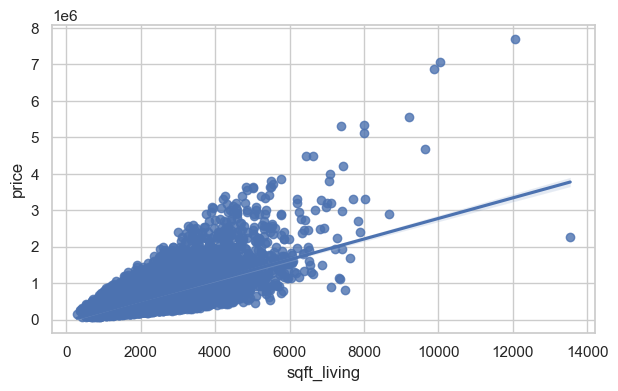

In [135]:
plt.figure(figsize=(7,4))
sns.regplot(data=raw, x='sqft_living', y='price')
plt.show()

In [136]:
#The largest value of 'sqft_living' (almost 14000) looks far away, but note that it is not far from the trendline. 
# On the other hand, we have 3 points with 'price' close to 7,000,000 or higher. 
# These 3 values are far from the trend line and do not seem to me to be representative of the typical case. 
# So let's set them to outliers and delete them. It is probably the values ​​above 17 that appear in the 'high range'.

In [137]:
raw.sort_values(by='sqft_living', ascending=False).head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
12777,2280000,7,8,13540,307752,3,4,3,9410,4130,1999,47.66750,-121.98600,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7252,7700000,6,8,12050,27600,2,3,4,8570,3480,1910,47.62980,-122.32300,104,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3914,7062500,5,4,10040,37325,2,2,3,7680,2360,1940,47.65000,-122.21400,74,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [138]:
raw=raw.drop([12777])

In [139]:
raw.sort_values(by = 'price', ascending = False)[:1]
raw = raw.drop(raw[raw['price'] == 7700000].index)
raw = raw.drop(raw[raw['price'] == 7062500].index)
raw = raw.drop(raw[raw['price'] == 6885000].index)

#### now for sqft_lot

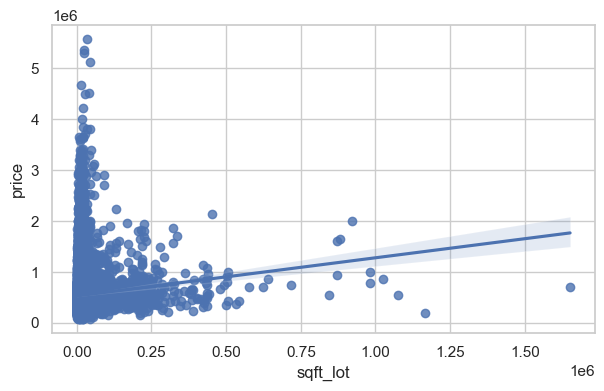

In [140]:
plt.figure(figsize=(7,4))
sns.regplot(data=raw, x='sqft_lot', y='price')
plt.show()

##### we can see that one value looks like outlier in ta sqft_lot so we get rid of it

In [141]:
raw.sort_values(by='sqft_lot', ascending=False).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
1719,700000,4,1,1300,1651359,1,3,4,1300,0,1920,47.23130,-122.02300,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17319,190000,2,1,710,1164794,1,0,2,710,0,1915,47.68880,-121.90900,100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7647,542500,5,3,3010,1074218,1,0,5,2010,1000,1931,47.45640,-122.00400,83,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7769,855000,4,3,4030,1024068,2,0,3,4030,0,2006,47.46190,-121.74400,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3949,998000,4,3,3770,982998,2,0,3,3770,0,1992,47.41400,-122.08700,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [142]:
raw =raw.drop(1719)

#### now for sqft_above

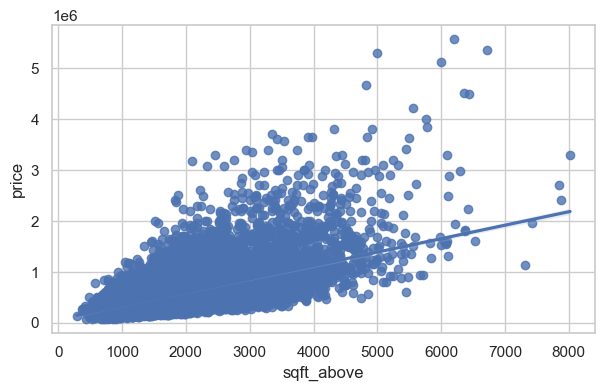

In [143]:
plt.figure(figsize=(7,4))
sns.regplot(data=raw, x='sqft_above', y='price')
plt.show()

#### normalization outlier remove

In [144]:
# def remove_outliers(raw):
#     '''removes entries with z-score above 3 for specific columns'''
#     variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15']
    
#     for variable in variables:
# #         print('the mean of' + variable)
#         raw = raw[np.abs(raw[variable]-raw[variable].mean()) <= (3*raw[variable].std())]  
#     return raw

##### 
np.abs(raw[variable]-raw[variable].mean()) calculates the absolute deviation of each value in the column from the mean.
(3*raw[variable].std()) calculates three times the standard deviation of the column.
<= compares each absolute deviation to three times the standard deviation, resulting in a boolean mask indicating whether each value is within three standard deviations of the mean.

In [145]:
# raw = remove_outliers(raw)

##### calculating mean of the variables


In [146]:
raw

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,221900,3,1,1180,5650,1,0,3,1180,0,1955,47.51120,-122.25700,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000,3,2,2570,7242,2,0,3,2170,400,1951,47.72100,-122.31900,63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,180000,2,1,770,10000,1,0,3,770,0,1933,47.73790,-122.23300,82,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000,4,3,1960,5000,1,0,5,1050,910,1965,47.52080,-122.39300,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000,3,2,1680,8080,1,0,3,1680,0,1987,47.61680,-122.04500,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,1131,3,0,3,1530,0,2009,47.69930,-122.34600,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21609,400000,4,2,2310,5813,2,0,3,2310,0,2014,47.51070,-122.36200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21610,402101,2,0,1020,1350,2,0,3,1020,0,2009,47.59440,-122.29900,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21611,400000,3,2,1600,2388,2,0,3,1600,0,2004,47.53450,-122.06900,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
raw.corr()['price']

price                 1.00000
bedrooms              0.31577
bathrooms             0.50524
sqft_living           0.69801
sqft_lot              0.08804
floors                0.23771
view                  0.39976
condition             0.03866
sqft_above            0.59977
sqft_basement         0.32202
yr_built              0.05410
lat                   0.31193
long                  0.01854
houseage             -0.05402
has_underground       0.18429
has_renovated         0.12263
city_Bellevue         0.14670
city_Black Diamond   -0.02177
city_Bothell         -0.02690
city_Carnation       -0.01746
city_Duvall          -0.02978
city_Enumclaw        -0.06537
city_Fall City        0.00735
city_Federal Way     -0.16598
city_Issaquah         0.08723
city_Kent            -0.16193
city_Kirkland         0.06619
city_Maple Valley    -0.08015
city_Medina           0.20370
city_Mercer Island    0.21132
city_North Bend      -0.02796
city_Redmond          0.09523
city_Renton          -0.10623
city_Seatt

In [148]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000
mean,537738.86209,3.36574,1.74568,2070.85714,14648.88952,1.44450,0.23573,3.40993,1778.85607,292.00107,1970.88891,47.55832,-122.21530,43.43446,0.39428,0.04242,0.05092,0.00467,0.02233,0.00579,0.00888,0.01088,0.00378,0.05330,0.05101,0.05620,0.04564,0.02756,0.00229,0.01317,0.01032,0.06629,0.07461,0.32346,0.05583,0.01448,0.03985,0.00551,0.01275,0.01476
std,358944.97842,0.90542,0.72983,904.59129,39427.54748,0.55214,0.76816,0.65152,815.89799,441.16735,29.44643,0.13803,0.14070,29.44837,0.48871,0.20155,0.21984,0.06819,0.14776,0.07589,0.09380,0.10376,0.06140,0.22464,0.22003,0.23031,0.20871,0.16372,0.04779,0.11402,0.10108,0.24879,0.26276,0.46781,0.22959,0.11947,0.19561,0.07404,0.11221,0.12060
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,1.00000,290.00000,0.00000,1900.00000,47.15590,-122.51900,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,320000.00000,3.00000,1.00000,1420.00000,5026.00000,1.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,47.46920,-122.32900,17.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,450000.00000,3.00000,2.00000,1910.00000,7569.00000,1.00000,0.00000,3.00000,1560.00000,0.00000,1974.00000,47.57025,-122.23300,40.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,640000.00000,4.00000,2.00000,2540.00000,10505.75000,2.00000,0.00000,4.00000,2200.00000,560.00000,1997.00000,47.67598,-122.12800,63.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,5570000.00000,10.00000,6.00000,9640.00000,1164794.00000,3.00000,4.00000,5.00000,8020.00000,4820.00000,2015.00000,47.77760,-121.31500,115.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [149]:
raw.shape

(21406, 40)

##### An observation with 33 bedrooms in 1620 ft, and come with only 1 bathrooms. The data was imputed to only 3 bedrooms.

In [150]:
# raw['bedrooms'].idxmax()
# raw['bedrooms']=raw['bedrooms'].replace(33,3)
#raw.iloc[[15870]]

#### removing outlier of maximum sqft_lot

In [151]:
# raw.drop(raw[raw['sqft_lot15'] >= 550000].index, inplace = True)
# raw.drop(raw[raw['sqft_lot'] >= 55000].index, inplace = True)

In [152]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000
mean,537738.86209,3.36574,1.74568,2070.85714,14648.88952,1.44450,0.23573,3.40993,1778.85607,292.00107,1970.88891,47.55832,-122.21530,43.43446,0.39428,0.04242,0.05092,0.00467,0.02233,0.00579,0.00888,0.01088,0.00378,0.05330,0.05101,0.05620,0.04564,0.02756,0.00229,0.01317,0.01032,0.06629,0.07461,0.32346,0.05583,0.01448,0.03985,0.00551,0.01275,0.01476
std,358944.97842,0.90542,0.72983,904.59129,39427.54748,0.55214,0.76816,0.65152,815.89799,441.16735,29.44643,0.13803,0.14070,29.44837,0.48871,0.20155,0.21984,0.06819,0.14776,0.07589,0.09380,0.10376,0.06140,0.22464,0.22003,0.23031,0.20871,0.16372,0.04779,0.11402,0.10108,0.24879,0.26276,0.46781,0.22959,0.11947,0.19561,0.07404,0.11221,0.12060
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,1.00000,290.00000,0.00000,1900.00000,47.15590,-122.51900,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,320000.00000,3.00000,1.00000,1420.00000,5026.00000,1.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,47.46920,-122.32900,17.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,450000.00000,3.00000,2.00000,1910.00000,7569.00000,1.00000,0.00000,3.00000,1560.00000,0.00000,1974.00000,47.57025,-122.23300,40.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,640000.00000,4.00000,2.00000,2540.00000,10505.75000,2.00000,0.00000,4.00000,2200.00000,560.00000,1997.00000,47.67598,-122.12800,63.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,5570000.00000,10.00000,6.00000,9640.00000,1164794.00000,3.00000,4.00000,5.00000,8020.00000,4820.00000,2015.00000,47.77760,-121.31500,115.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


##### incrementing the housage by one as some houses had negative ages which are outliers

In [153]:
raw.loc[raw['houseage']<=0,'houseage'] +=1

In [154]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000
mean,537738.86209,3.36574,1.74568,2070.85714,14648.88952,1.44450,0.23573,3.40993,1778.85607,292.00107,1970.88891,47.55832,-122.21530,43.45511,0.39428,0.04242,0.05092,0.00467,0.02233,0.00579,0.00888,0.01088,0.00378,0.05330,0.05101,0.05620,0.04564,0.02756,0.00229,0.01317,0.01032,0.06629,0.07461,0.32346,0.05583,0.01448,0.03985,0.00551,0.01275,0.01476
std,358944.97842,0.90542,0.72983,904.59129,39427.54748,0.55214,0.76816,0.65152,815.89799,441.16735,29.44643,0.13803,0.14070,29.41822,0.48871,0.20155,0.21984,0.06819,0.14776,0.07589,0.09380,0.10376,0.06140,0.22464,0.22003,0.23031,0.20871,0.16372,0.04779,0.11402,0.10108,0.24879,0.26276,0.46781,0.22959,0.11947,0.19561,0.07404,0.11221,0.12060
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,1.00000,290.00000,0.00000,1900.00000,47.15590,-122.51900,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,320000.00000,3.00000,1.00000,1420.00000,5026.00000,1.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,47.46920,-122.32900,17.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,450000.00000,3.00000,2.00000,1910.00000,7569.00000,1.00000,0.00000,3.00000,1560.00000,0.00000,1974.00000,47.57025,-122.23300,40.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,640000.00000,4.00000,2.00000,2540.00000,10505.75000,2.00000,0.00000,4.00000,2200.00000,560.00000,1997.00000,47.67598,-122.12800,63.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,5570000.00000,10.00000,6.00000,9640.00000,1164794.00000,3.00000,4.00000,5.00000,8020.00000,4820.00000,2015.00000,47.77760,-121.31500,115.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [155]:
raw.corr()['price']

price                 1.00000
bedrooms              0.31577
bathrooms             0.50524
sqft_living           0.69801
sqft_lot              0.08804
floors                0.23771
view                  0.39976
condition             0.03866
sqft_above            0.59977
sqft_basement         0.32202
yr_built              0.05410
lat                   0.31193
long                  0.01854
houseage             -0.05379
has_underground       0.18429
has_renovated         0.12263
city_Bellevue         0.14670
city_Black Diamond   -0.02177
city_Bothell         -0.02690
city_Carnation       -0.01746
city_Duvall          -0.02978
city_Enumclaw        -0.06537
city_Fall City        0.00735
city_Federal Way     -0.16598
city_Issaquah         0.08723
city_Kent            -0.16193
city_Kirkland         0.06619
city_Maple Valley    -0.08015
city_Medina           0.20370
city_Mercer Island    0.21132
city_North Bend      -0.02796
city_Redmond          0.09523
city_Renton          -0.10623
city_Seatt

In [156]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000,21406.00000
mean,537738.86209,3.36574,1.74568,2070.85714,14648.88952,1.44450,0.23573,3.40993,1778.85607,292.00107,1970.88891,47.55832,-122.21530,43.45511,0.39428,0.04242,0.05092,0.00467,0.02233,0.00579,0.00888,0.01088,0.00378,0.05330,0.05101,0.05620,0.04564,0.02756,0.00229,0.01317,0.01032,0.06629,0.07461,0.32346,0.05583,0.01448,0.03985,0.00551,0.01275,0.01476
std,358944.97842,0.90542,0.72983,904.59129,39427.54748,0.55214,0.76816,0.65152,815.89799,441.16735,29.44643,0.13803,0.14070,29.41822,0.48871,0.20155,0.21984,0.06819,0.14776,0.07589,0.09380,0.10376,0.06140,0.22464,0.22003,0.23031,0.20871,0.16372,0.04779,0.11402,0.10108,0.24879,0.26276,0.46781,0.22959,0.11947,0.19561,0.07404,0.11221,0.12060
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,1.00000,290.00000,0.00000,1900.00000,47.15590,-122.51900,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,320000.00000,3.00000,1.00000,1420.00000,5026.00000,1.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,47.46920,-122.32900,17.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,450000.00000,3.00000,2.00000,1910.00000,7569.00000,1.00000,0.00000,3.00000,1560.00000,0.00000,1974.00000,47.57025,-122.23300,40.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,640000.00000,4.00000,2.00000,2540.00000,10505.75000,2.00000,0.00000,4.00000,2200.00000,560.00000,1997.00000,47.67598,-122.12800,63.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,5570000.00000,10.00000,6.00000,9640.00000,1164794.00000,3.00000,4.00000,5.00000,8020.00000,4820.00000,2015.00000,47.77760,-121.31500,115.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


#### we found that there are 13 entries without any bedrooms in the house. Since it is not common to have houses without bedrooms, thus we decided to exclude these observations.

In [157]:
raw.drop(raw[raw['bedrooms']==0].index,inplace=True)

#### changing the datatype of outside_space to int

##### pearson correlation matrix to see the correlations between the columns

<AxesSubplot: title={'center': 'Pearson Correlation Matrix'}>

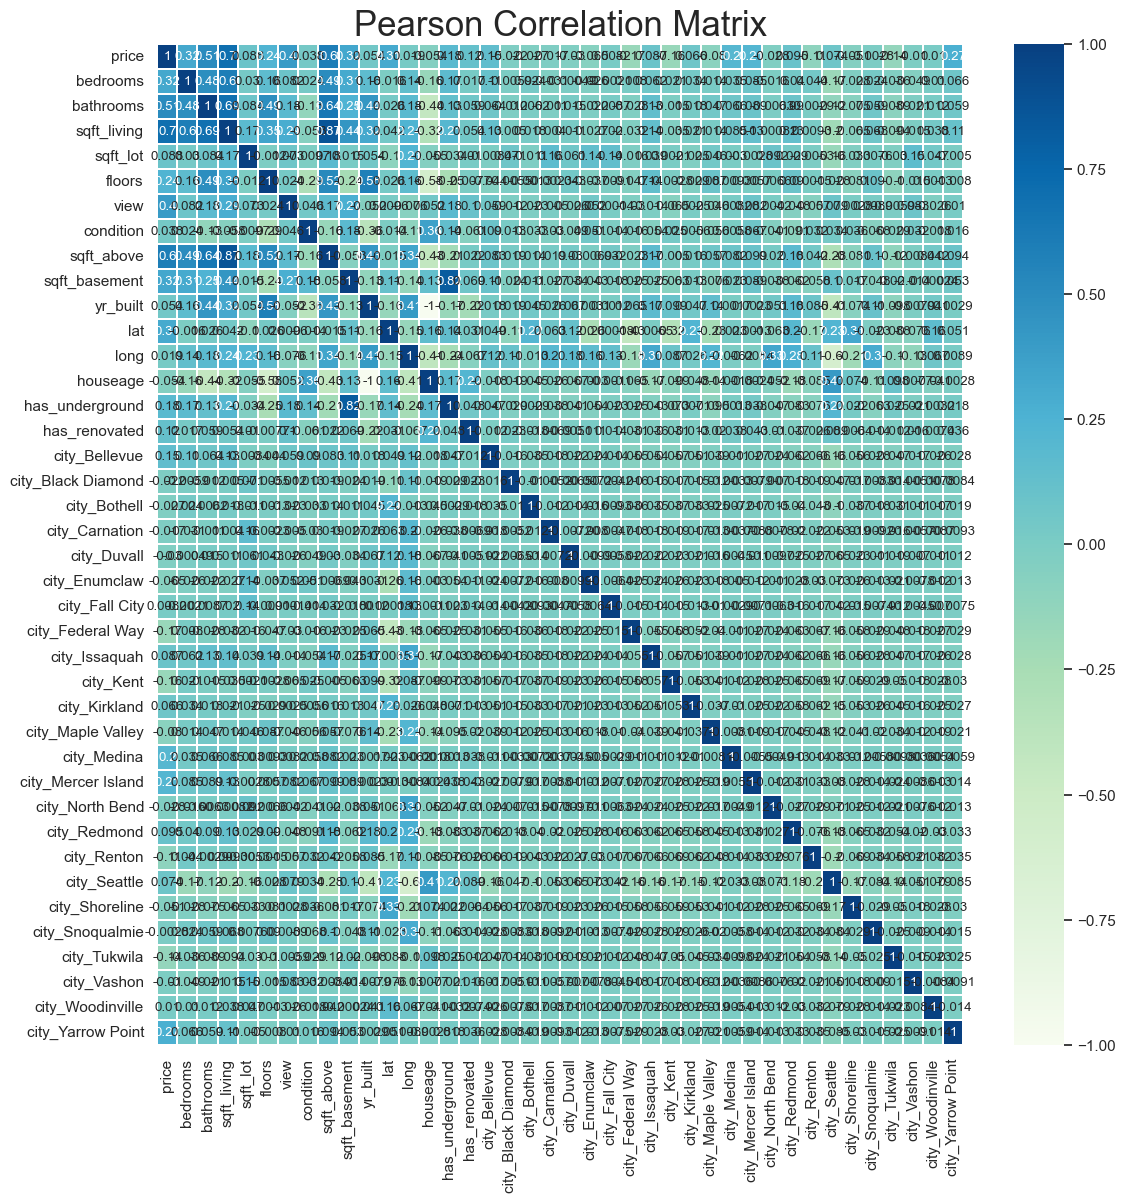

In [158]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(raw.corr(),linewidths=0.25,vmax=1,vmin=-1,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":9.5}, cbar={"shrink": 1})

In [159]:
raw.dtypes

price                   int32
bedrooms                int64
bathrooms               int32
sqft_living             int64
sqft_lot                int64
floors                  int32
view                    int64
condition               int64
sqft_above              int64
sqft_basement           int64
yr_built                int64
lat                   float64
long                  float64
houseage                int64
has_underground         int64
has_renovated           int64
city_Bellevue           uint8
city_Black Diamond      uint8
city_Bothell            uint8
city_Carnation          uint8
city_Duvall             uint8
city_Enumclaw           uint8
city_Fall City          uint8
city_Federal Way        uint8
city_Issaquah           uint8
city_Kent               uint8
city_Kirkland           uint8
city_Maple Valley       uint8
city_Medina             uint8
city_Mercer Island      uint8
city_North Bend         uint8
city_Redmond            uint8
city_Renton             uint8
city_Seatt

In [74]:
raw

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,221900,3,1,1180,5650,1,0,3,1180,0,1955,47.5112,-122.257,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000,3,2,2570,7242,2,0,3,2170,400,1951,47.7210,-122.319,63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,180000,2,1,770,10000,1,0,3,770,0,1933,47.7379,-122.233,82,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000,4,3,1960,5000,1,0,5,1050,910,1965,47.5208,-122.393,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000,3,2,1680,8080,1,0,3,1680,0,1987,47.6168,-122.045,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,1131,3,0,3,1530,0,2009,47.6993,-122.346,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21609,400000,4,2,2310,5813,2,0,3,2310,0,2014,47.5107,-122.362,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21610,402101,2,0,1020,1350,2,0,3,1020,0,2009,47.5944,-122.299,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21611,400000,3,2,1600,2388,2,0,3,1600,0,2004,47.5345,-122.069,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
dfq1=raw.copy()

C:\Users\nepal\AppData\Local\Temp\ipykernel_15940\368876404.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(smap, label = 'price in USD')


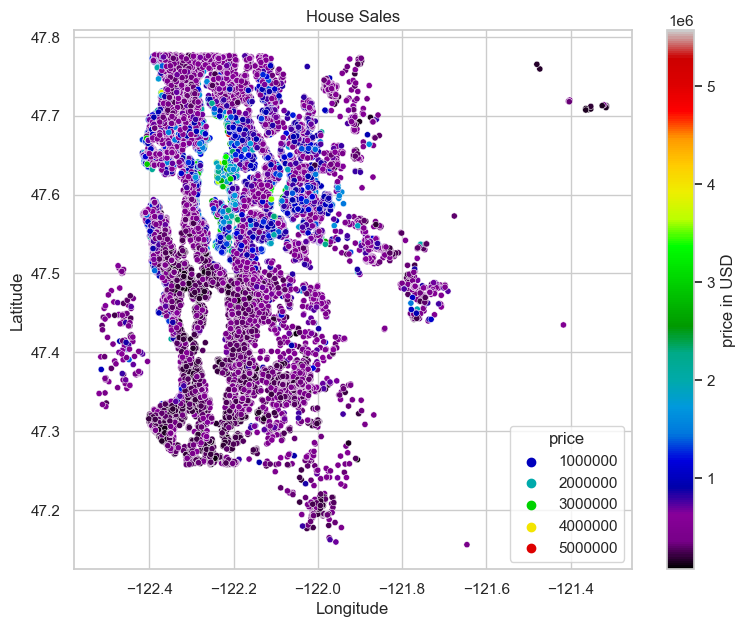

In [80]:
# Plot scatter plot
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = dfq1['long'], y = dfq1['lat'], hue = dfq1['price'],
                palette = 'nipy_spectral',s=20, data = dfq1)

norm = plt.Normalize(dfq1['price'].min(), dfq1['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Sales')
plt.show()

C:\Users\nepal\AppData\Local\Temp\ipykernel_10984\3227306774.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,6))


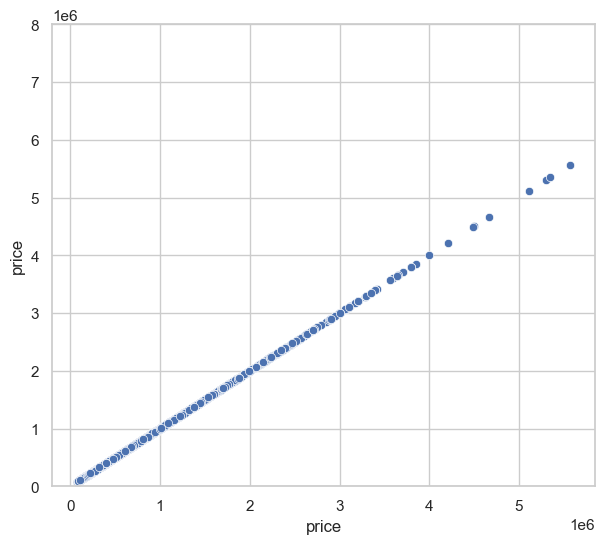

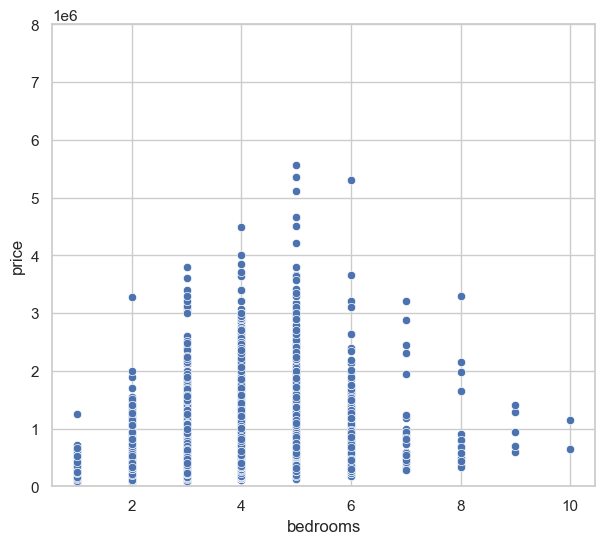

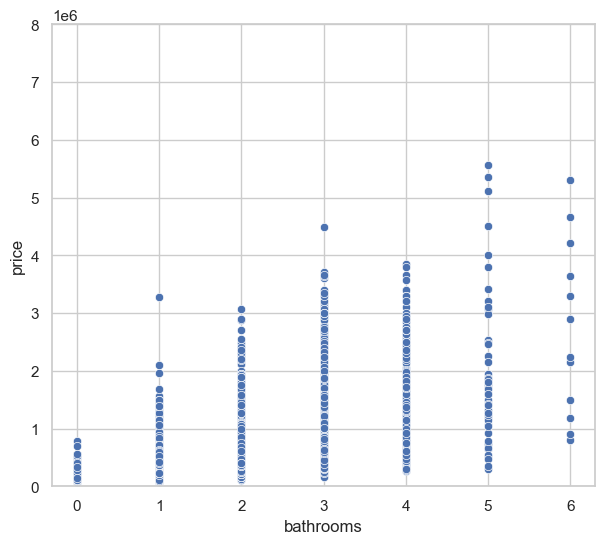

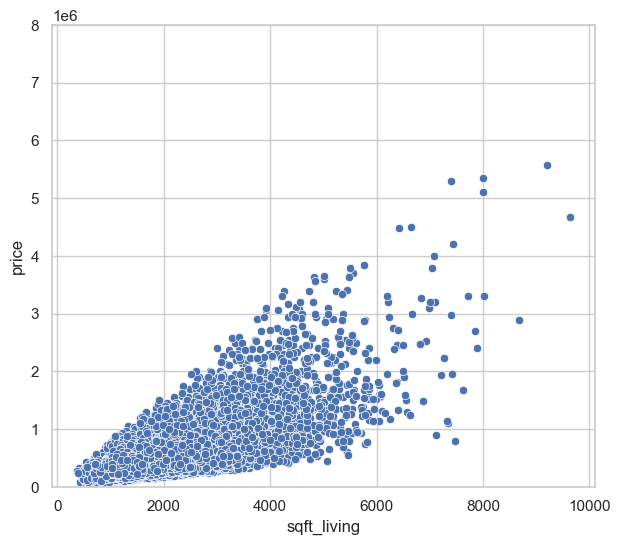

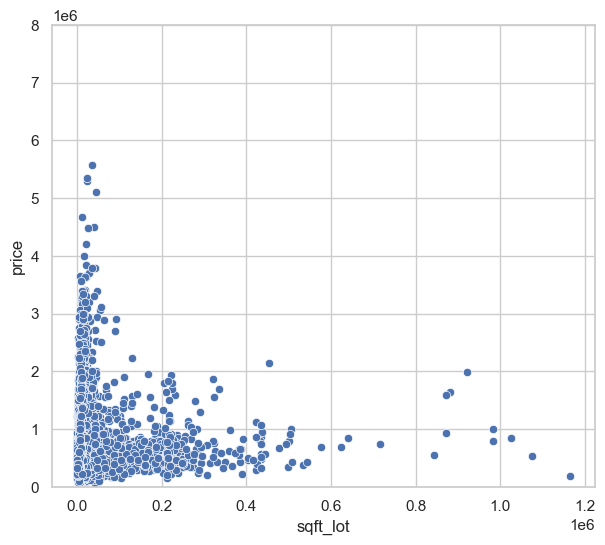

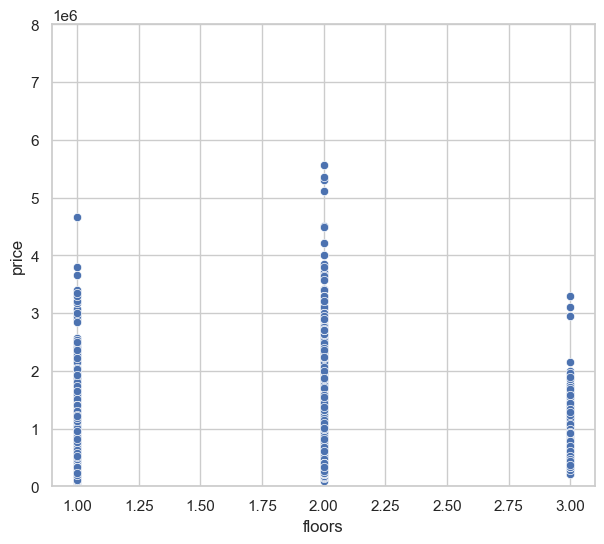

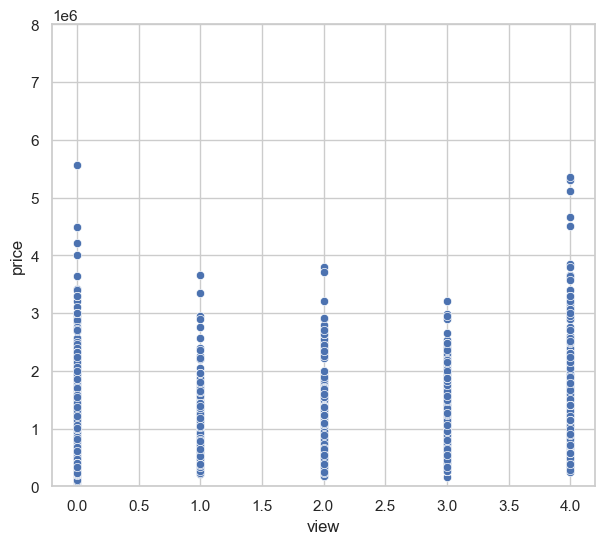

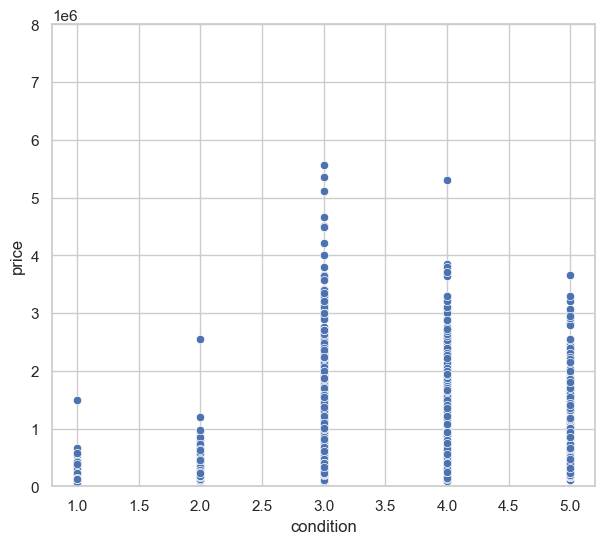

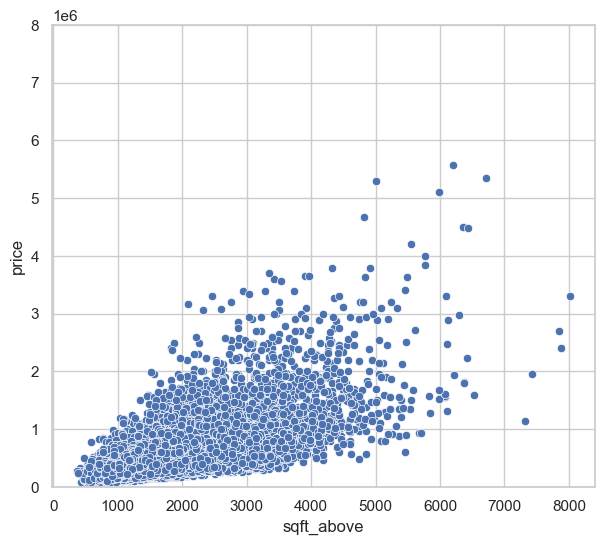

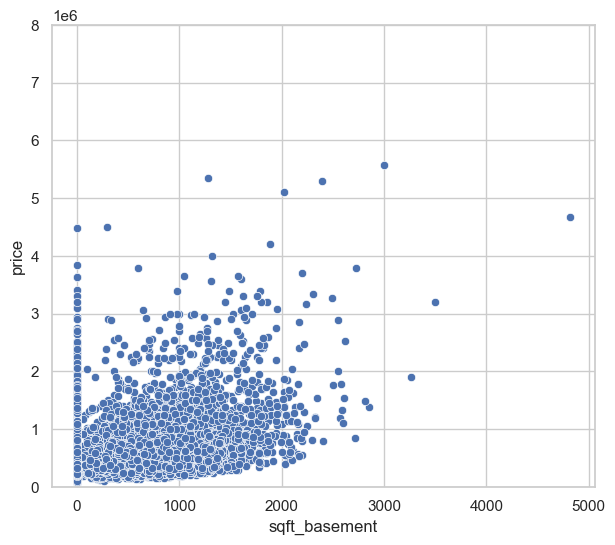

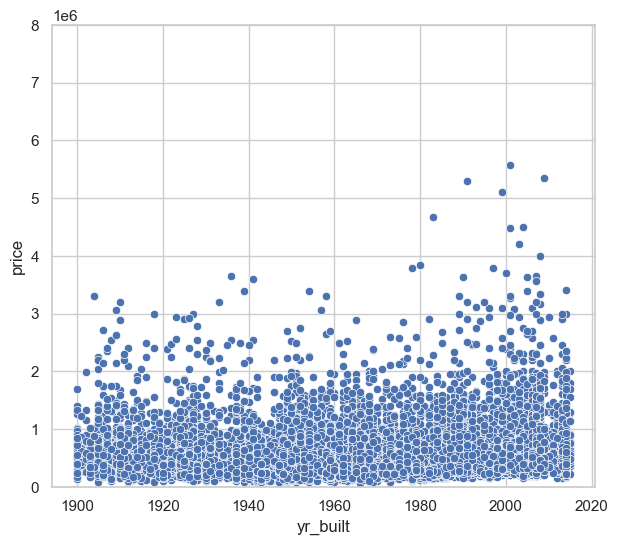

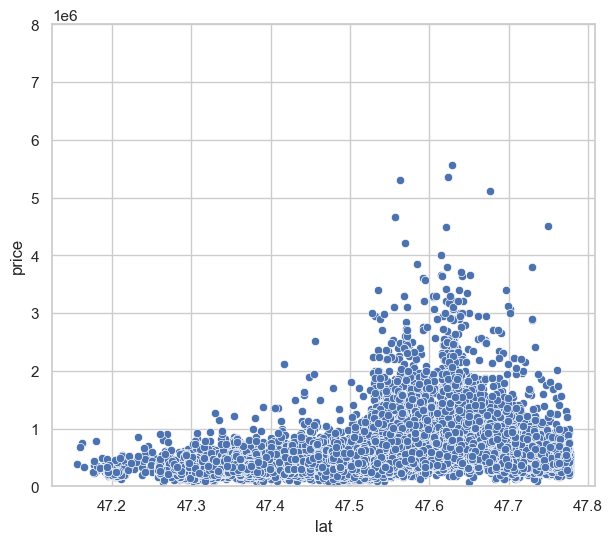

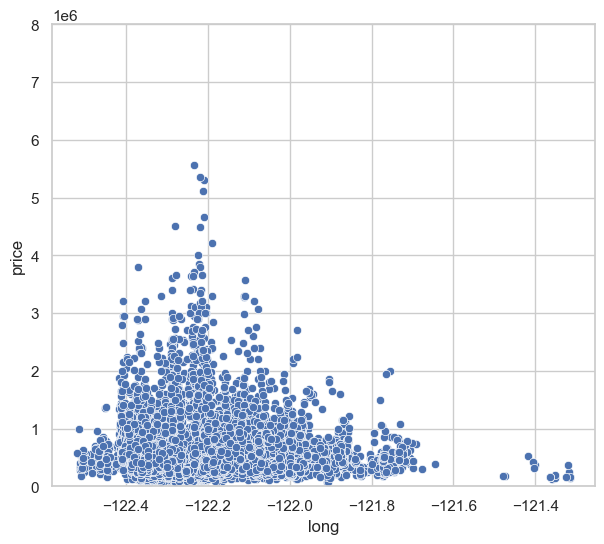

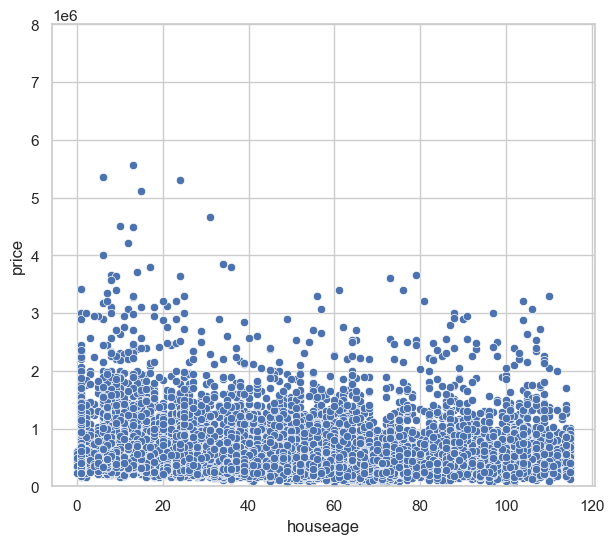

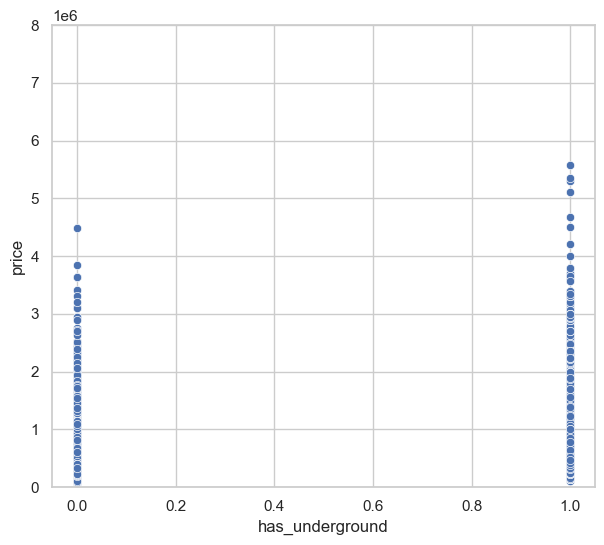

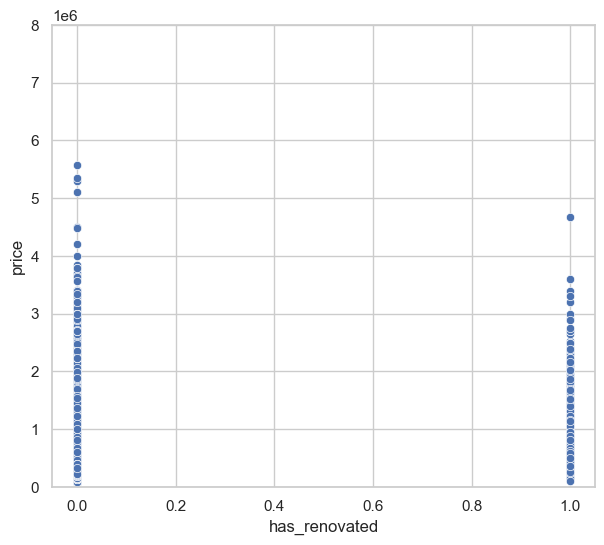

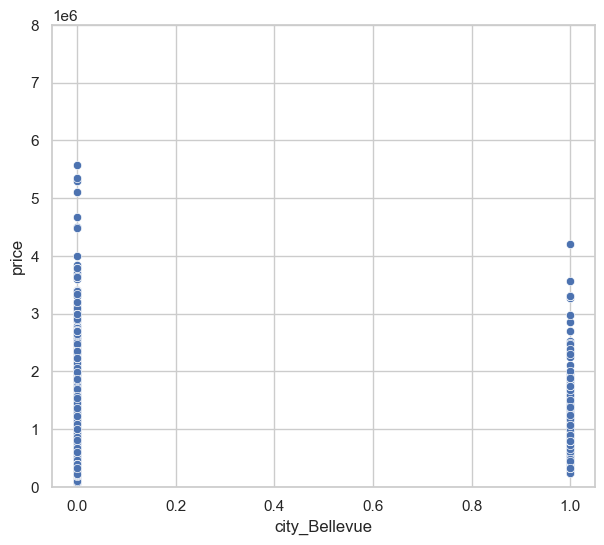

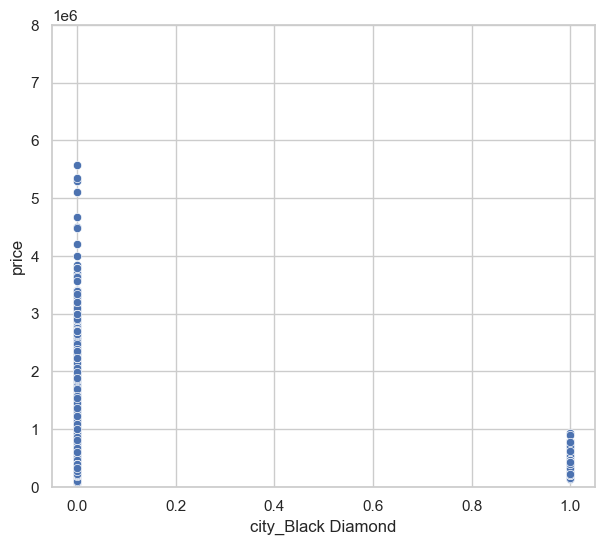

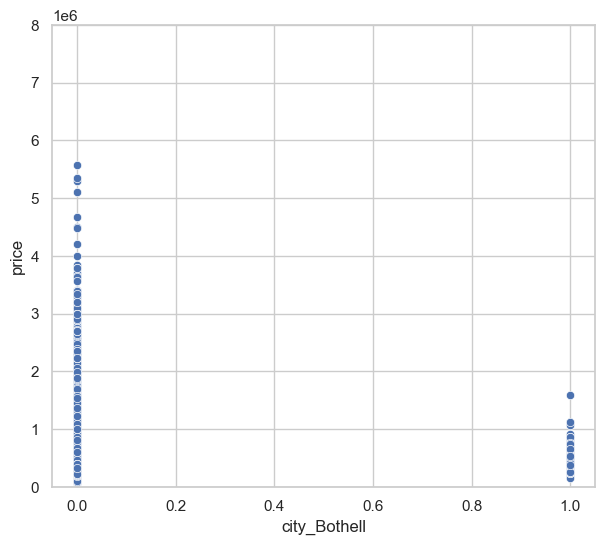

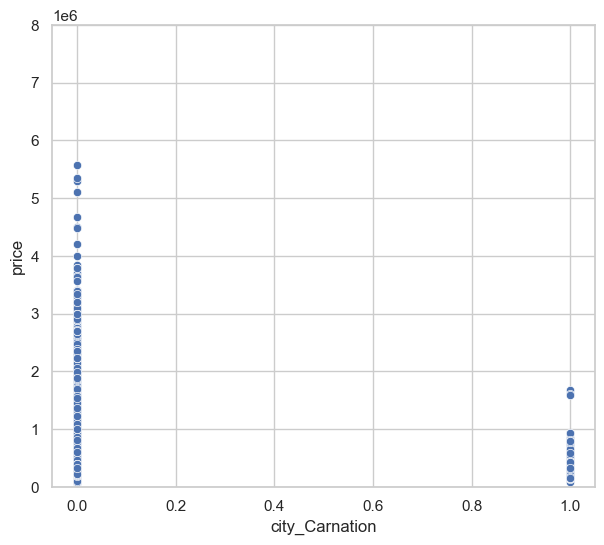

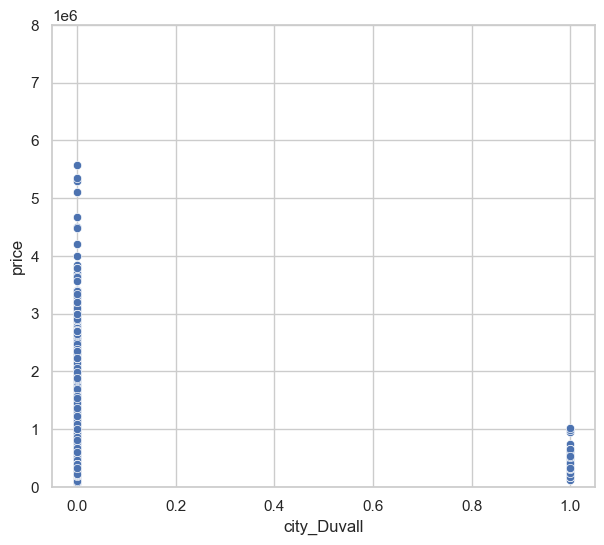

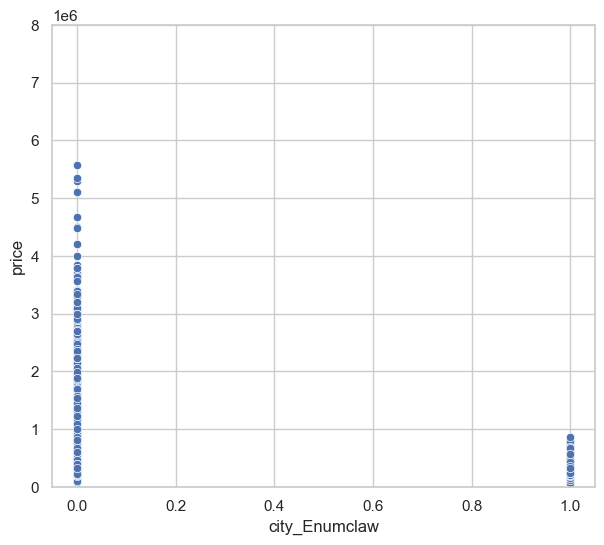

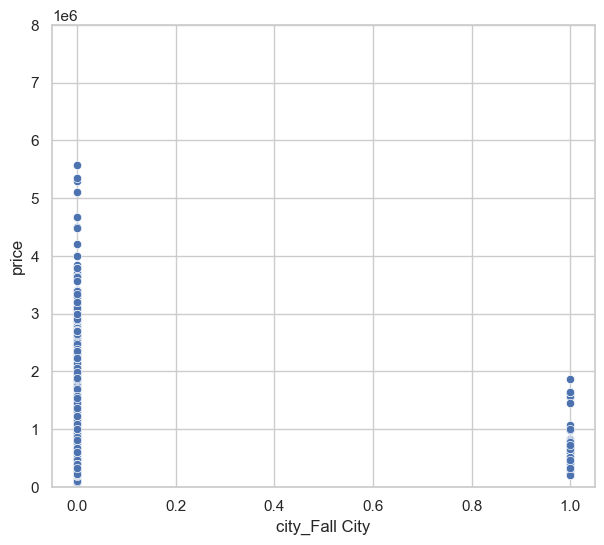

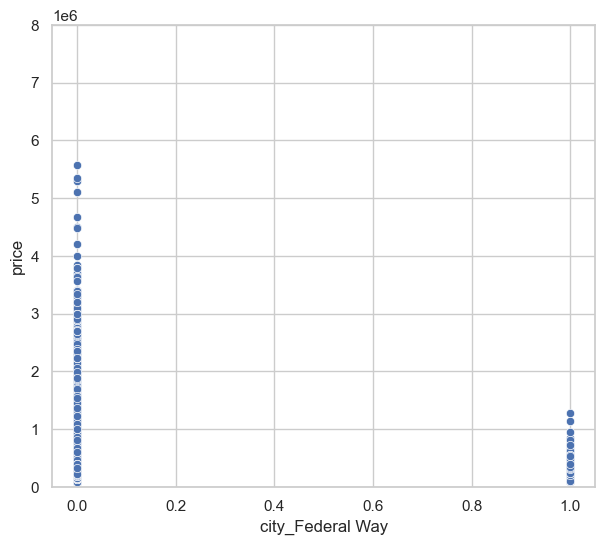

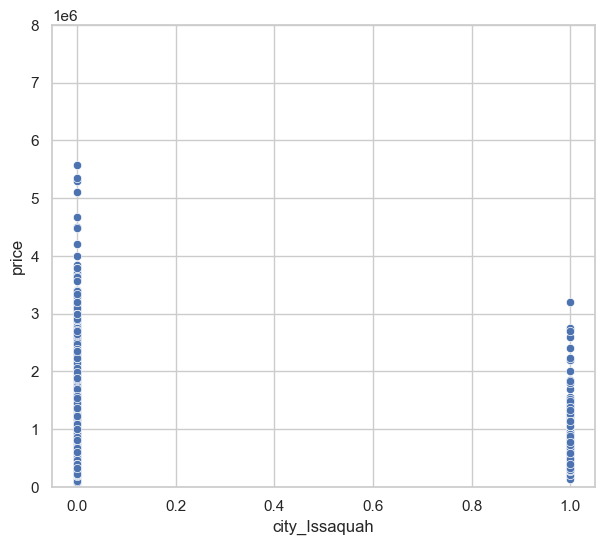

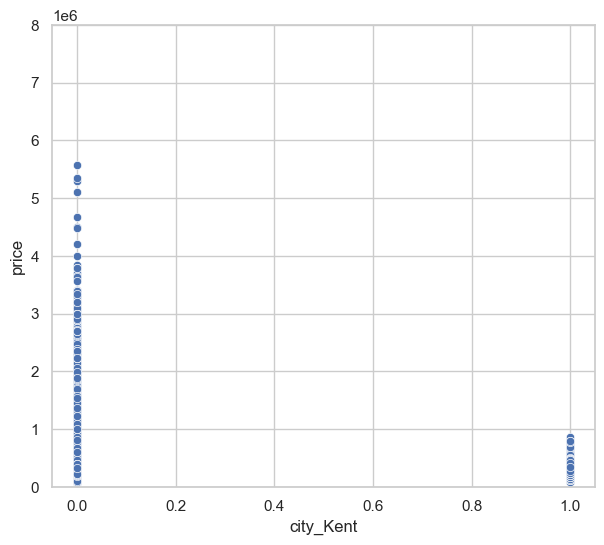

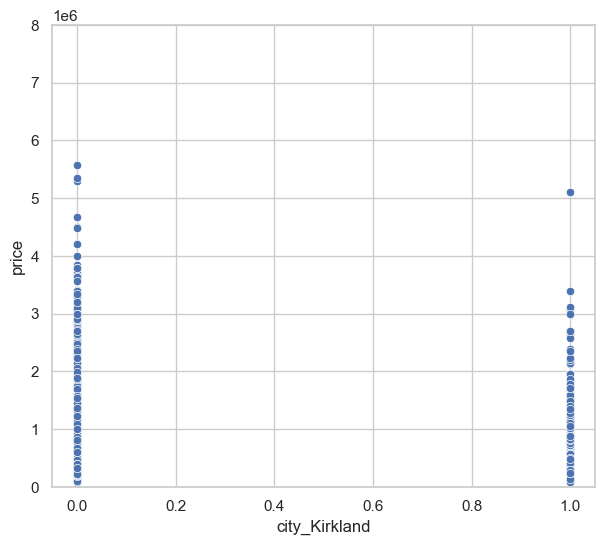

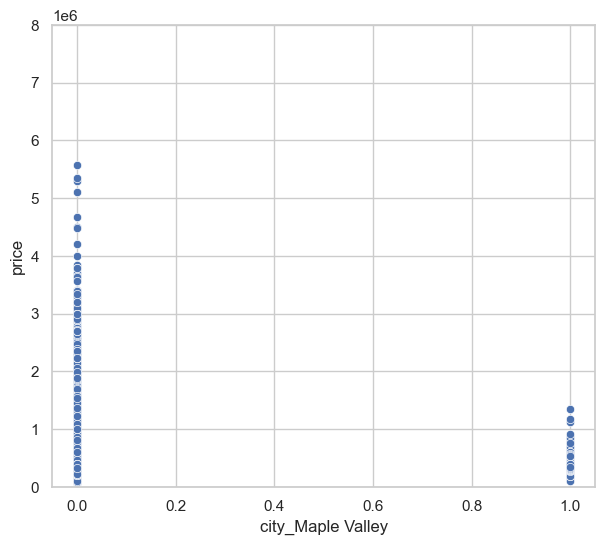

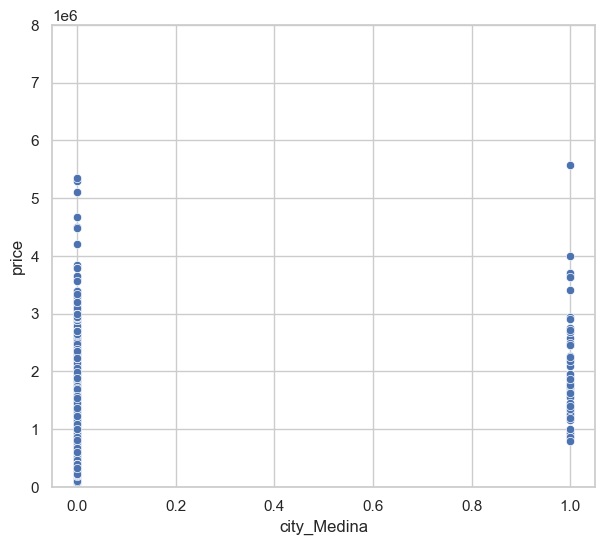

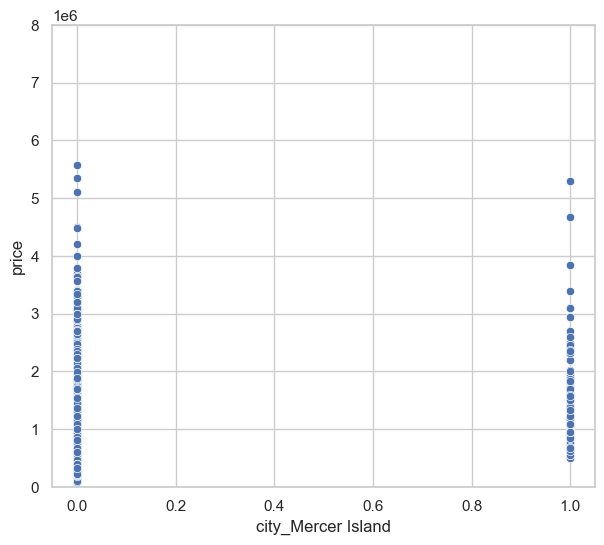

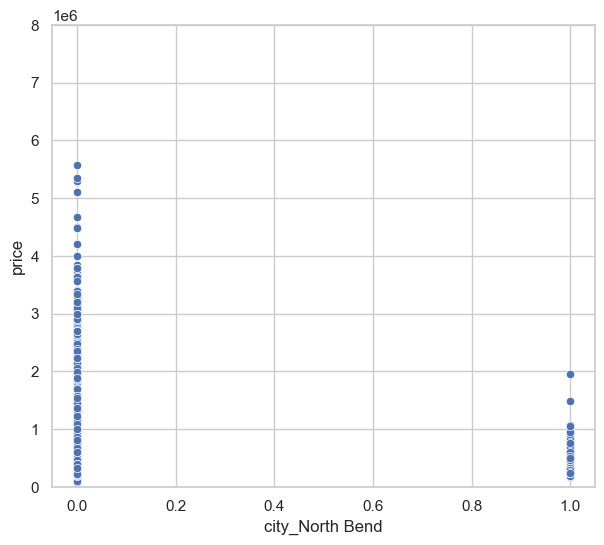

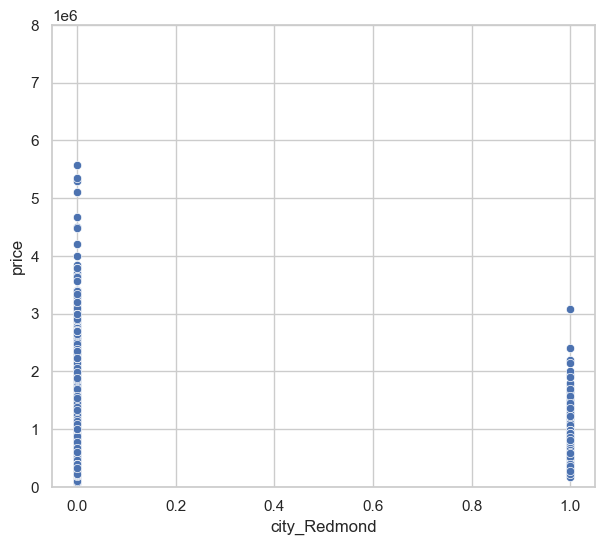

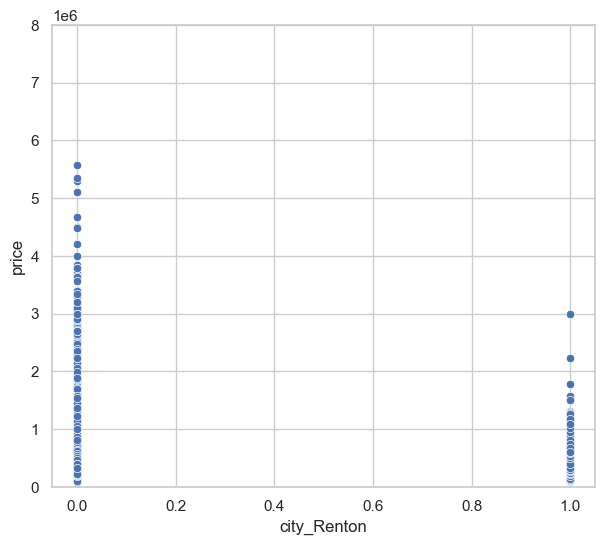

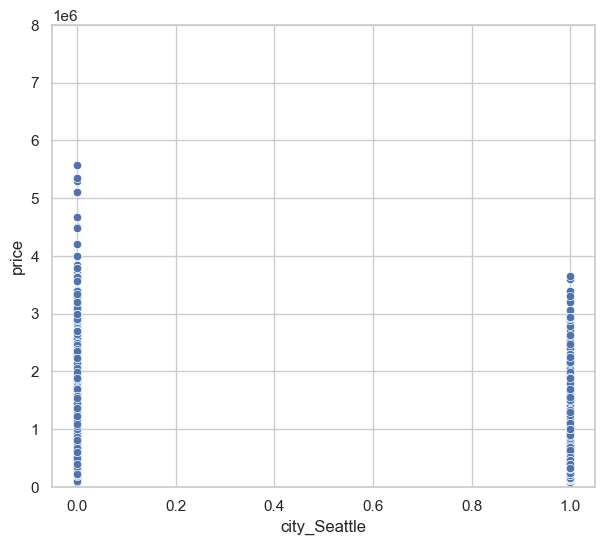

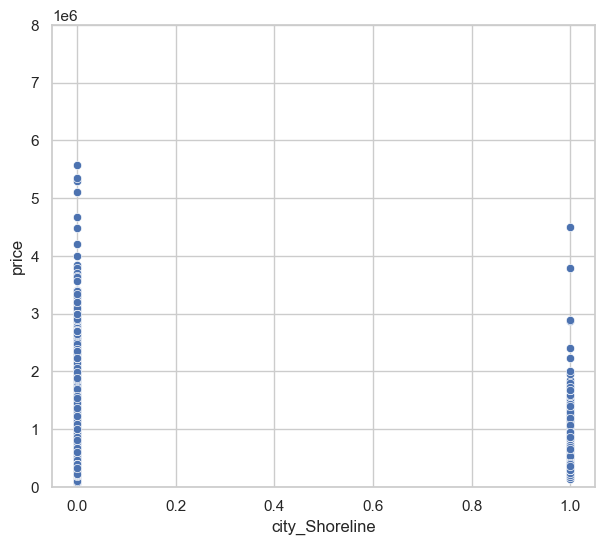

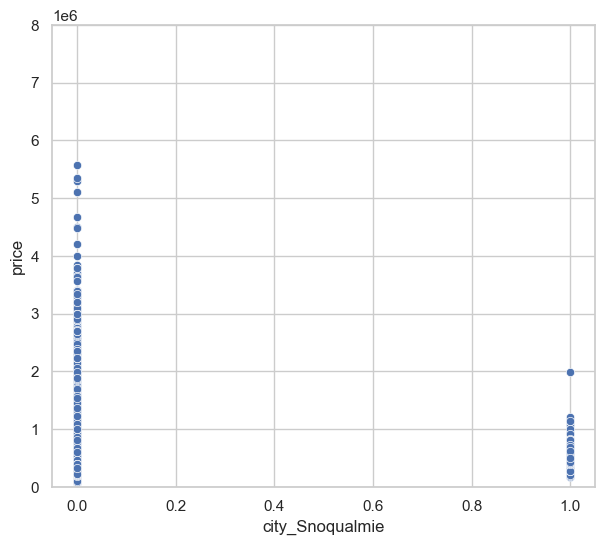

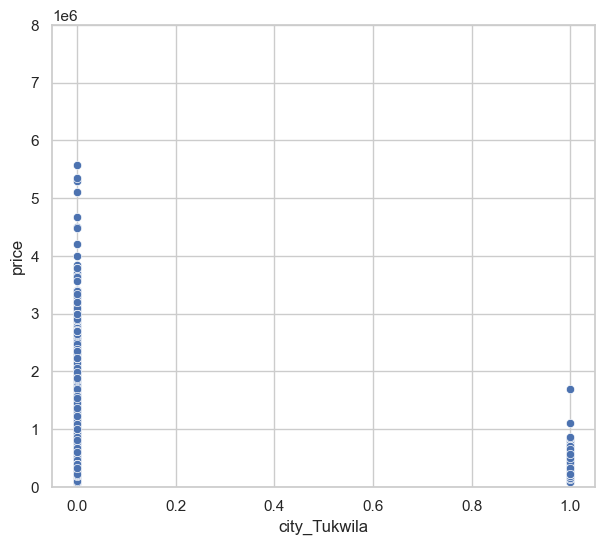

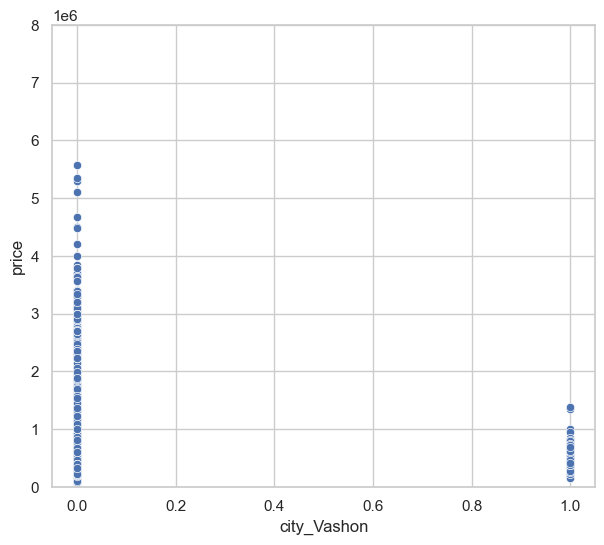

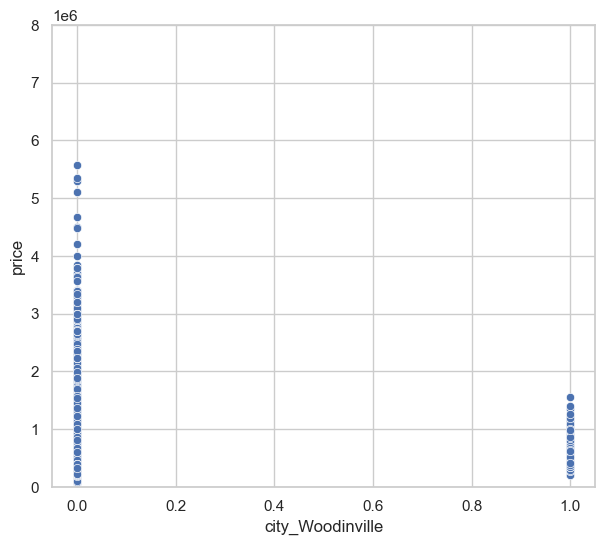

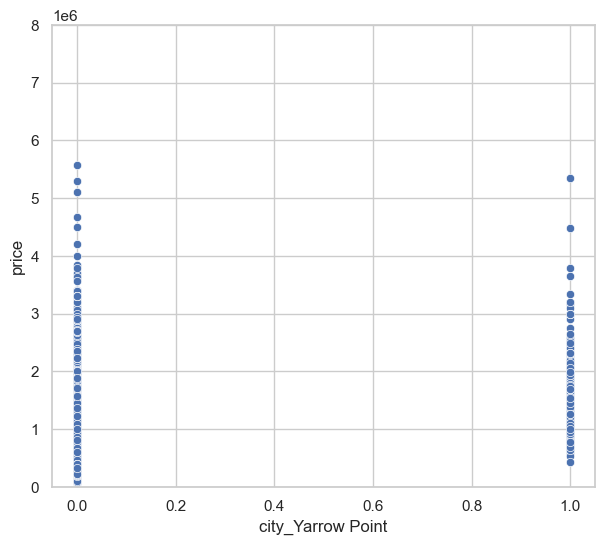

In [160]:
for c in raw.columns:
    plt.figure(figsize=(7,6))
    plt.ylim(0,8000000)
    sns.scatterplot(x=c,y='price',data=raw)

In [150]:
raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,yr_built,lat,long,houseage,has_underground,has_renovated,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000,21393.00000
mean,537816.78736,3.36778,1.74637,2071.07774,14643.12121,1.44421,0.23568,3.41027,1778.89922,1970.88104,47.55835,-122.21534,43.46300,0.39452,0.04244,0.05095,0.00467,0.02234,0.00580,0.00888,0.01089,0.00374,0.05329,0.05104,0.05614,0.04567,0.02753,0.00229,0.01318,0.01033,0.06628,0.07465,0.32352,0.05581,0.01440,0.03987,0.00547,0.01276,0.01477
std,358939.58647,0.90189,0.72923,904.33448,39415.40213,0.55189,0.76819,0.65136,815.60365,29.44702,0.13802,0.14064,29.41874,0.48876,0.20160,0.21990,0.06821,0.14780,0.07591,0.09382,0.10379,0.06104,0.22461,0.22009,0.23020,0.20877,0.16363,0.04781,0.11406,0.10111,0.24878,0.26283,0.46783,0.22956,0.11912,0.19567,0.07375,0.11224,0.12064
min,75000.00000,1.00000,0.00000,370.00000,520.00000,1.00000,0.00000,1.00000,370.00000,1900.00000,47.15590,-122.51900,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,320000.00000,3.00000,1.00000,1420.00000,5026.00000,1.00000,0.00000,3.00000,1190.00000,1951.00000,47.46920,-122.32900,17.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,450000.00000,3.00000,2.00000,1910.00000,7570.00000,1.00000,0.00000,3.00000,1560.00000,1974.00000,47.57030,-122.23300,40.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,640000.00000,4.00000,2.00000,2540.00000,10506.00000,2.00000,0.00000,4.00000,2200.00000,1997.00000,47.67600,-122.12800,63.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,5570000.00000,10.00000,6.00000,9640.00000,1164794.00000,3.00000,4.00000,5.00000,8020.00000,2015.00000,47.77760,-121.31500,115.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [161]:
raw.shape

(21393, 40)

In [164]:
raw.to_csv('testdataset.csv',index=False)

In [165]:
raw.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'houseage', 'has_underground', 'has_renovated', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kent', 'city_Kirkland', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'],
      dtype='object')

In [167]:
raw.dtypes

price                   int32
bedrooms                int64
bathrooms               int32
sqft_living             int64
sqft_lot                int64
floors                  int32
view                    int64
condition               int64
sqft_above              int64
sqft_basement           int64
yr_built                int64
lat                   float64
long                  float64
houseage                int64
has_underground         int64
has_renovated           int64
city_Bellevue           uint8
city_Black Diamond      uint8
city_Bothell            uint8
city_Carnation          uint8
city_Duvall             uint8
city_Enumclaw           uint8
city_Fall City          uint8
city_Federal Way        uint8
city_Issaquah           uint8
city_Kent               uint8
city_Kirkland           uint8
city_Maple Valley       uint8
city_Medina             uint8
city_Mercer Island      uint8
city_North Bend         uint8
city_Redmond            uint8
city_Renton             uint8
city_Seatt

## model testing